# Ford GoBike / Bay Wheels - Exploratory Analysis
## by Mayke Ilzu

## Preliminary Wrangling

Bay Wheels, previously Ford GoBike, is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

This document explore a data set includes information about individual rides made in Bay Wheels covering the greater San Francisco Bay area.

The columns of dataset are:

- duration_sec: trip duration in seconds
- start_time: trip start time
- end_time: trip end time
- start_station_id: trip start station id
- start_station_name: trip start station name
- start_station_latitude: trip start station lat
- start_station_longitude: trip start station long
- end_station_id: trip end station id
- end_station_name: trip end station name
- end_station_latitude: trip end station lat
- end_station_longitude: trip end station long
- bike_id: bike id
- user_type: type of user. Customer (Occasional) or Subscriber
- member_birth_year: user birth year
- member_gender: user gender
- bike_share_for_all_trip: ?


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

%matplotlib inline

## Gathering data

In [2]:
#Load dataset
df_bay = pd.read_csv('C:/git-repository/data-analyst-nanodegree/projects/project-5-communicate-data-findings/data/201902-fordgobike-tripdata.csv')
df_bay.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assessing data

In [3]:
#Check count
df_bay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- We have some features with missing values:
    - start_station_id
    - start_station_name
    - end_station_id
    - end_station_name
    - member_birth_year
    - member_gender
    
- Date columns as object
    - start_time
    - end_time
- member_birth_year as float instead int

- Categorical columns as object:
    - user_type
    - member_gender
    - bike_share_for_all_trip

In [4]:
#Count missing data
df_bay.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#Visualize the data
df_bay

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [6]:
#Check describe
df_bay.describe()[['duration_sec','member_birth_year']]

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [7]:
print('Percentile 90: ' + str(np.percentile(df_bay['duration_sec'],90)) + '\n'
      'Percentile 95: ' + str(np.percentile(df_bay['duration_sec'],95)) + '\n'
      'Percentile 99: ' + str(np.percentile(df_bay['duration_sec'],99)))

Percentile 90: 1178.0
Percentile 95: 1571.0
Percentile 99: 3458.889999999985


- Duration
    - median lower than mean
    - high standard devation
    - the max value looks wrong

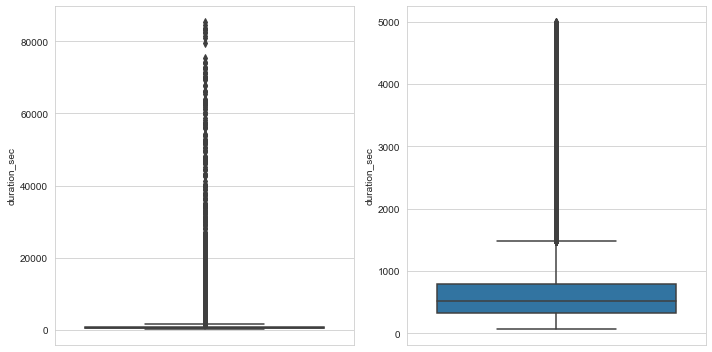

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sb.boxplot(data=df_bay,y='duration_sec')

df_bay_duration = df_bay[df_bay['duration_sec'] <= 5000] #here a i check with <=9000 and <=7500 but values greater than 5000 look like outliers

plt.subplot(1,2,2)
sb.boxplot(data=df_bay_duration,y='duration_sec')
plt.tight_layout();

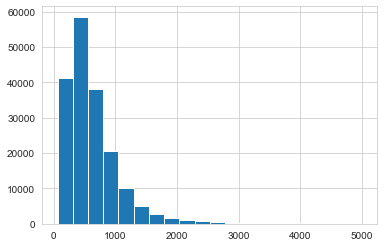

In [9]:
plt.hist(data=df_bay_duration,x='duration_sec',bins=20);

Here IQR could be applied to remove outliers, but the 99th percentile indicates a trip of 3458 seconds and this seems perfectly feasible.So, it seems reasonable to consider trips of up to 5000 seconds

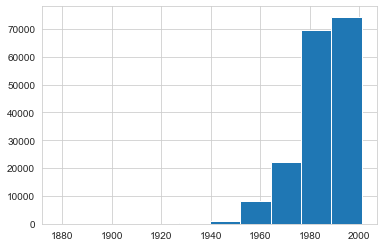

In [10]:
plt.hist(data=df_bay,x='member_birth_year');

- Someone born in 1878 and sharing bike its improbable. Assessing the histogram, it seems reasonable to consider only those born after 1940

In [11]:
#Check duplicated rows
df_bay.duplicated().sum()

0

In [12]:
#Check unique values
df_bay.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [13]:
#Check categorical columns
df_bay.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [14]:
#Check categorical columns
df_bay.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [15]:
#Check categorical columns
df_bay.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

**Quality issues**
- Missing data
- Date columns as object
    - start_time
    - end_time
- member_birth_year as float instead int
- Categorical columns as object:
    - user_type
    - member_gender
    - bike_share_for_all_trip
- Bike sharing with very long duration. It seems reasonable to consider trips of up to 5000 seconds
- Very old people

**Tidiness issues**
- Missing an age column
- Missing a column with duration in minutes
- Missing hour column for start and end date
- Missing day of week column for start and end date

## Cleaning data

In [16]:
#Creating copy of df
df_bay_clean = df_bay.copy()

In [17]:
#Remove missing data
df_bay_clean = df_bay_clean.dropna()
df_bay_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [18]:
#Change dates columns to date datatype
df_bay_clean['start_time'] = df_bay_clean['start_time'].astype('datetime64')
df_bay_clean['end_time'] = df_bay_clean['end_time'].astype('datetime64')
df_bay_clean[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  174952 non-null  datetime64[ns]
 1   end_time    174952 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


In [19]:
#Change member_birth_year to int
df_bay_clean['member_birth_year'] = df_bay_clean['member_birth_year'].astype('Int64')
df_bay_clean[['member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   member_birth_year  174952 non-null  Int64
dtypes: Int64(1)
memory usage: 2.8 MB


In [20]:
#Change categorical columns to category datatype
df_bay_clean['user_type'] = df_bay_clean['user_type'].astype('category')
df_bay_clean['member_gender'] = df_bay_clean['member_gender'].astype('category')
df_bay_clean['bike_share_for_all_trip'] = df_bay_clean['bike_share_for_all_trip'].astype('category')
df_bay_clean[['user_type','member_gender','bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   user_type                174952 non-null  category
 1   member_gender            174952 non-null  category
 2   bike_share_for_all_trip  174952 non-null  category
dtypes: category(3)
memory usage: 1.8 MB


In [21]:
#Remove bike sharing with very long duration
df_bay_clean = df_bay_clean[(df_bay_clean['duration_sec'] <= 5000) ]

In [22]:
#Check describe again
df_bay_clean.describe()[['duration_sec','member_birth_year']]

,duration_sec,member_birth_year
count,174068.000000,174068.000000
mean,628.826694,1984.808190
std,483.421483,10.117383
min,61.000000,1878.000000
25%,322.000000,1980.000000
50%,508.000000,1987.000000
75%,783.000000,1992.000000
max,4998.000000,2001.000000


In [23]:
#Remove very old people, filtering only who born only from 1940 onwards
df_bay_clean = df_bay_clean[df_bay_clean['member_birth_year'] >= 1940]

In [24]:
#Create age column
df_bay_clean['start_year'] = df_bay_clean.start_time.dt.strftime('%Y')
df_bay_clean['start_year'] = df_bay_clean['start_year'].astype('int64')
df_bay_clean['age'] = df_bay_clean['start_year'] - df_bay_clean['member_birth_year']
df_bay_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_year,age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019,60
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,2019,36
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,2019,30
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,2019,31
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,2019,27
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,2019,23
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993,Male,No,2019,26
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990,Male,No,2019,29
14,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243.0,Bancroft Way at College Ave,37.869360,-122.254337,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,4786,Subscriber,1988,Male,No,2019,31


In [25]:
#Create duration in minutes column
df_bay_clean['duration_min'] = (df_bay_clean['duration_sec'] / 60).round().astype('float64')
df_bay_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_year,age,duration_min
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,45,26.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019,60,30.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,2019,36,19.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,2019,30,27.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,2019,31,26.0


In [26]:
#Check describe again
df_bay_clean.describe()[['duration_sec','member_birth_year','age','duration_min']]

,duration_sec,member_birth_year,age,duration_min
count,173865.000000,173865.000000,173865.000000,173865.000000
mean,629.038254,1984.883105,34.116895,10.483795
std,483.459983,9.868645,9.868645,8.061787
min,61.000000,1941.000000,18.000000,1.000000
25%,322.000000,1980.000000,27.000000,5.000000
50%,508.000000,1987.000000,32.000000,8.000000
75%,783.000000,1992.000000,39.000000,13.000000
max,4998.000000,2001.000000,78.000000,83.000000


In [27]:
#Creating hour columns for start and end date
df_bay_clean['start_hour'] = df_bay_clean.start_time.dt.strftime('%H')
df_bay_clean['end_hour'] = df_bay_clean.end_time.dt.strftime('%H')

order = df_bay_clean['end_hour'].unique()
order = np.sort(order)

df_bay_clean['start_hour'] = pd.Categorical(df_bay_clean["start_hour"], categories = order)
df_bay_clean['end_hour'] = pd.Categorical(df_bay_clean["end_hour"], categories = order)


df_bay_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_year,age,duration_min,start_hour,end_hour
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,2019,45,26.0,23,00
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,2019,60,30.0,23,00
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,2019,36,19.0,23,00
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,2019,30,27.0,23,00
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,2019,31,26.0,23,00


In [28]:
#Creating weekday columns for start and end date
df_bay_clean['start_day_of_week'] = df_bay_clean.start_time.dt.strftime('%A')
df_bay_clean['end_day_of_week'] = df_bay_clean.end_time.dt.strftime('%A')

week_categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_bay_clean['start_day_of_week'] = pd.Categorical(df_bay_clean["start_day_of_week"], categories = week_categories)
df_bay_clean['end_day_of_week'] = pd.Categorical(df_bay_clean["end_day_of_week"], categories = week_categories)

df_bay_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_year,age,duration_min,start_hour,end_hour,start_day_of_week,end_day_of_week
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2019,45,26.0,23,00,Thursday,Friday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,2019,60,30.0,23,00,Thursday,Friday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,1983,Female,No,2019,36,19.0,23,00,Thursday,Friday
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1989,Male,No,2019,30,27.0,23,00,Thursday,Friday
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,1988,Other,No,2019,31,26.0,23,00,Thursday,Friday


### What is the structure of your dataset?

The dataset is structured containing a bike sharing in each line, containing data of route, location and customers. So we can divide the features between:

**Route data:**

- duration_sec
- duration_min
- start_time
- end_time
- start_hour
- end_hour
- start_day_of_week
- end_day_of_week
- bike_id

**Location data**

- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude

**Customers data**

- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip
- age

### What is/are the main feature(s) of interest in your dataset?

I believe the following features can provide interesting insights about the data:

- start_station_name
- end_station_name
- user_type
- member_gender
- bike_share_for_all_trip
- start_day_of_week
- end_day_of_week

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will support:
- duration_min
- age
- start_hour
- end_hour

## Univariate Exploration

In [29]:
#Setting color base for all univariate plots
color = sb.color_palette()[0]

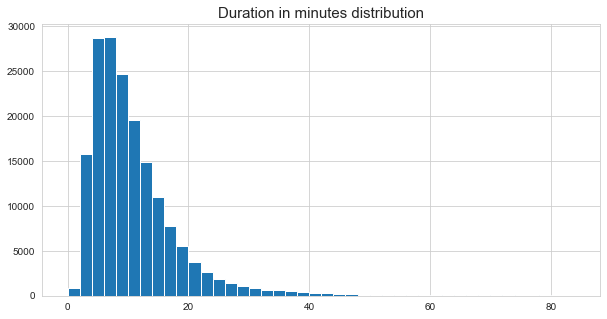

In [30]:
#Check duration in minutes distribution
fig, ax = plt.subplots(figsize=[10,5])
bins = np.arange(0, df_bay_clean['duration_min'].max()+2, 2)
plt.hist(data=df_bay_clean,x='duration_min',bins=bins,color=color)
plt.title('Duration in minutes distribution',fontsize=15);

Most bike sharing lasted up to 10 minutes, with the greatest mass being between 5 and 10 minutes.

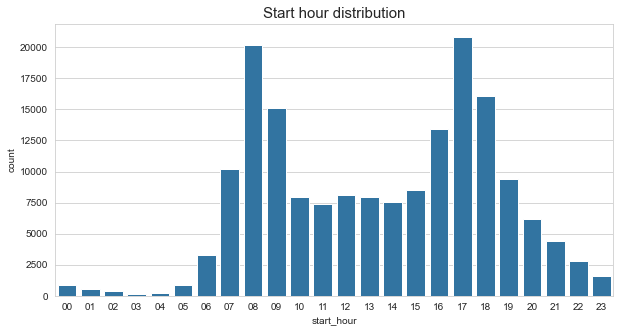

In [31]:
#Check start hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='start_hour',color=color)
plt.title('Start hour distribution',fontsize=15);

We can identify 2 peak times for bike sharing start hour: from 8 am to 9 am and 4 pm to 6 pm

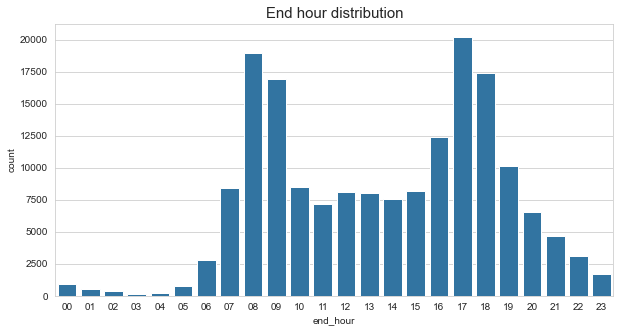

In [32]:
#Check end hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='end_hour',color=color)
plt.title('End hour distribution',fontsize=15);

End hour distribution is practically the same as start hour, which makes sense as bike sharing usually lasts an average of 9 minutes.

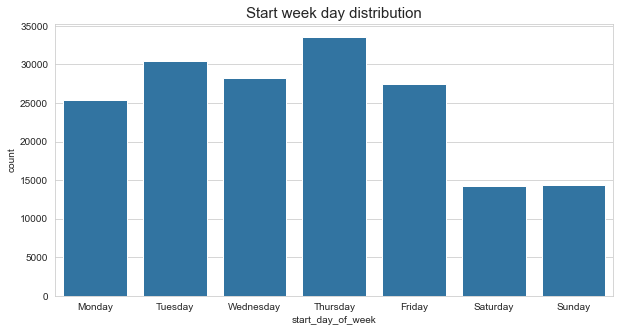

In [33]:
#Check start hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='start_day_of_week',color=color)

plt.title('Start week day distribution',fontsize=15);

We have a smaller number of trips on weekends

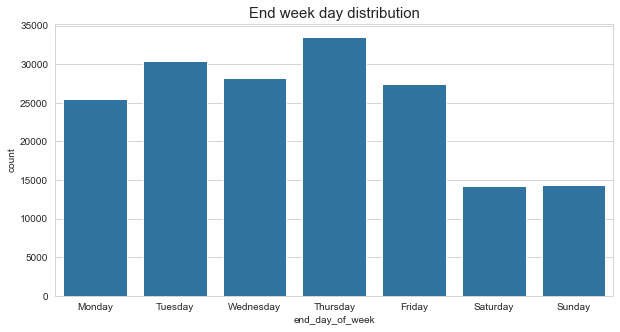

In [34]:
#Check start hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='end_day_of_week',color=color)
plt.title('End week day distribution',fontsize=15);

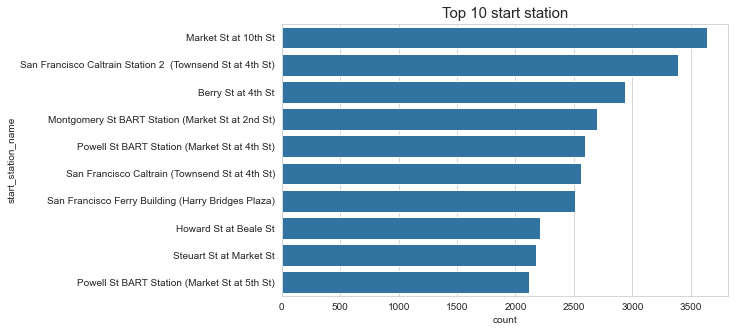

In [35]:
#Check top 10 start station
df_bay_top_10_ss = df_bay_clean.start_station_name.value_counts().head(10).reset_index()
df_bay_top_10_ss.columns = ['start_station_name', 'count']
fig, ax = plt.subplots(figsize=[8,5])
sb.barplot(data=df_bay_top_10_ss,x='count',y='start_station_name',color=color)
plt.title('Top 10 start station',fontsize=15);

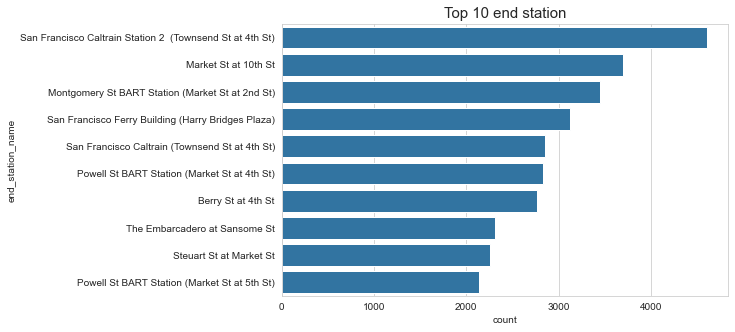

In [36]:
#Check top 10 end station
df_bay_top_10_ss = df_bay_clean.end_station_name.value_counts().head(10).reset_index()
df_bay_top_10_ss.columns = ['end_station_name', 'count']
fig, ax = plt.subplots(figsize=[8,5])
sb.barplot(data=df_bay_top_10_ss,x='count',y='end_station_name',color=color)
plt.title('Top 10 end station',fontsize=15);

Market St and San Francisco Caltrain Station 2 are the most embarking and disembarking stations.

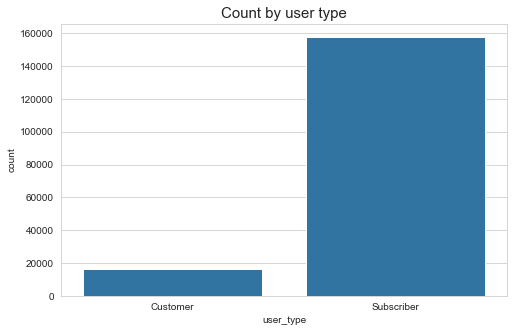

In [37]:
#Check user type counts
fig, ax = plt.subplots(figsize=[8,5])
sb.countplot(data=df_bay_clean,x='user_type',color=color)
plt.title('Count by user type',fontsize=15);

Most users are subscribers.

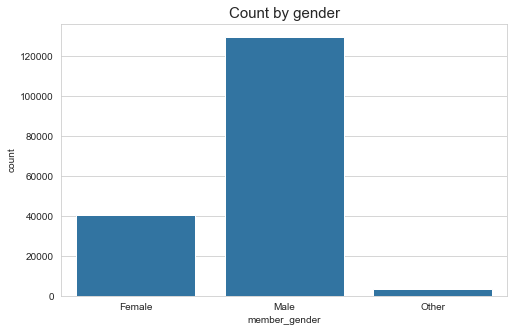

In [38]:
#Check mmember gender counts
fig, ax = plt.subplots(figsize=[8,5])
sb.countplot(data=df_bay_clean,x='member_gender',color=color)
plt.title('Count by gender',fontsize=15);

Users are mostly male, but this may not be a particularity of service users, since we do not know the gender distribution in the city

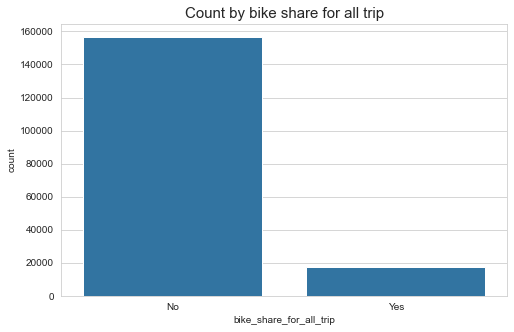

In [39]:
#Check bike_share_for_all_trip counts
fig, ax = plt.subplots(figsize=[8,5])
sb.countplot(data=df_bay_clean,x='bike_share_for_all_trip',color=color)
plt.title('Count by bike share for all trip',fontsize=15);

Most of the route was not completed with bike share.

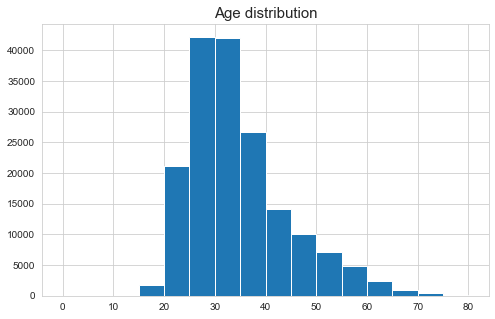

In [40]:
#Check age distribution
fig, ax = plt.subplots(figsize=[8,5])
bins = np.arange(0, df_bay_clean['age'].max()+5, 5)
plt.hist(data=df_bay_clean,x='age',bins=bins,color=color,alpha=1)
plt.title('Age distribution',fontsize=15);

Most users are between 25 and 40 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After investigating the features of interest, I identified the following insights:

- Most bike sharing lasted up to 10 minutes, with the greatest mass being between 5 and 10 minutes
- Most users are subscribed, meaning there are few occasional customers
- We can identify 2 peak times for bike sharing start hour: from 8 am to 9 am and 5 pm to 6 pm. As most users are subscribers, they may have greater influence on peak hours, which are exactly business hours where people usually go to work, so this may be a behavior of these users and the greater distribution of trips on weekdays can reinforce this hypothesis
- End hour distribution is practically the same as start hour, which makes sense as bike sharing usually lasts an average of 9 minutes
- Market St and San Francisco Caltrain Station 2 are the most embarking and disembarking stations
- Although more males use the service this may not be a particularity of service users, since we do not know the gender distribution in the city
- Most of the route was not completed with bike share. As the difference is so big, it's not worth investigating this feature further
- Most frequent users have between 25 and 40 years old

With the transformations performed in the data wrangling step, it was not necessary to apply new transformations, since the data behaved within the normal range

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During the data exploration step no, but during the data wrangling some transformations/corrections were performed. The problems identified were:

**Quality issues**
- Missing data
- Date columns as object
    - start_time
    - end_time
- member_birth_year as float instead int
- Categorical columns as object:
    - user_type
    - member_gender
    - bike_share_for_all_trip
- Bike sharing with very long duration. It seems reasonable to consider trips of up to 5000 seconds
- Very old people

**Tidiness issues**
- Missing an age column
- Missing a column with duration in minutes
- Missing hour column for start and end date
- Missing day of week column for start and end date


## Bivariate Exploration

#### What is the duration for each type of user type ?

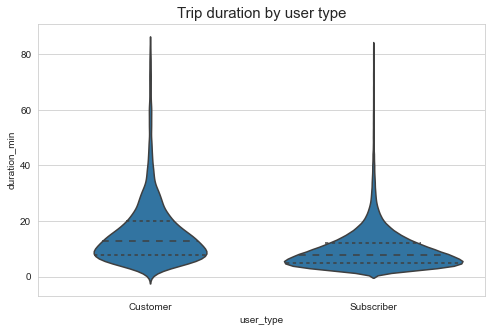

In [41]:
fig, ax = plt.subplots(figsize=[8,5])
sb.violinplot(data=df_bay_clean, x='user_type', y='duration_min', color=color, inner='quartile')
plt.title('Trip duration by user type',fontsize=15);

As we can see in the violin, users who are occasional customers have a longer trip duration. This makes sense, as subscribers should use the bike more routinely and for a specific purpose, while occasional customers should use it more for leisure or longer trips

#### What is the duration for each member gender ?

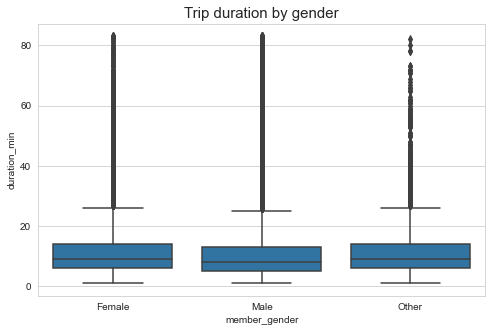

In [42]:
fig, ax = plt.subplots(figsize=[8,5])
sb.boxplot(data=df_bay_clean, x='member_gender', y='duration_min', color=color)
plt.title('Trip duration by gender',fontsize=15);

The trip duration is practically the same for all genders

#### What is the age for each type of user type ?

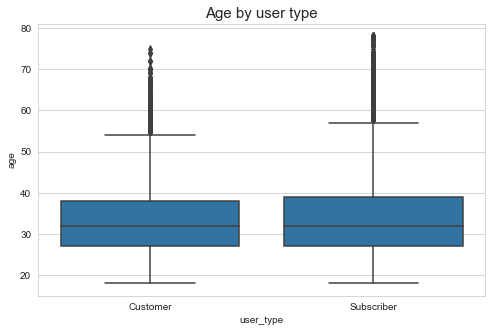

In [43]:
fig, ax = plt.subplots(figsize=[8,5])
sb.boxplot(data=df_bay_clean, x='user_type', y='age', color=color)
plt.title('Age by user type',fontsize=15);

 Age is practically the same for all user type

#### What is the age for each member gender ?

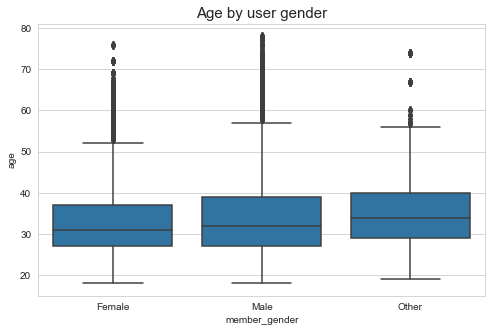

In [44]:
fig, ax = plt.subplots(figsize=[8,5])
sb.boxplot(data=df_bay_clean, x='member_gender', y='age', color=color)
plt.title('Age by user gender',fontsize=15);

As with the trip duration, gender seems to have no relation to the user's age

#### What is the user type favorite start and end hour ?

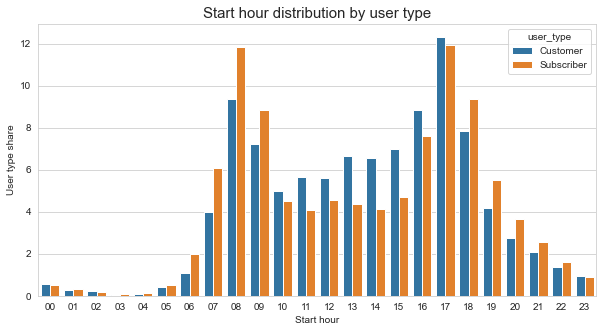

In [45]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','start_hour']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='start_hour',y='duration_sec', hue='user_type')
ax.set_xlabel('Start hour')
ax.set_ylabel('User type share')
plt.title('Start hour distribution by user type',fontsize=15);

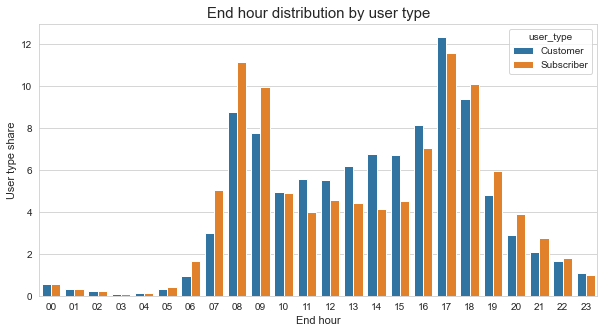

In [46]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','end_hour']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='end_hour',y='duration_sec', hue='user_type')
ax.set_xlabel('End hour',fontsize=11)
ax.set_ylabel('User type share',fontsize=11)
plt.title('End hour distribution by user type',fontsize=15);

Contrary to what I imagined, peak times are very similar between user types, but we can see an interesting behavior: excluding peak times, occasional customers tend to use the service more at afternoon than subscribers, who use more at evening.

#### What is the user type favorite day of week ?

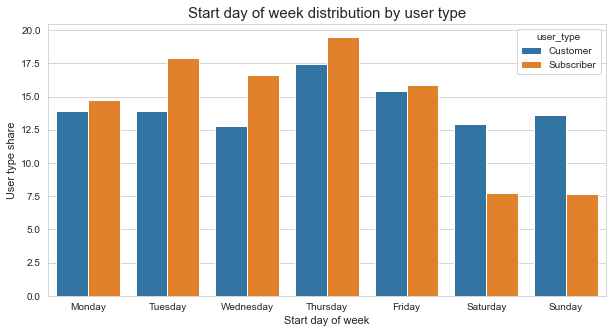

In [47]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','start_day_of_week']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='start_day_of_week',y='duration_sec',  hue='user_type')
ax.set_xlabel('Start day of week',fontsize=11)
ax.set_ylabel('User type share',fontsize=11)
plt.title('Start day of week distribution by user type',fontsize=15);

Contrary to what is seen in the behavior of Subscribers, the use of the service by occasional customers remains at the same level on weekends

#### Is there a correlation between age and trip duration

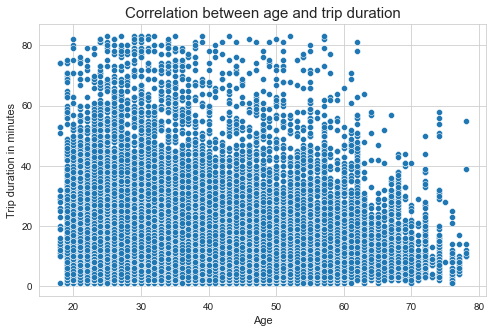

In [48]:
fig, ax = plt.subplots(figsize=[8,5])
sb.scatterplot(data=df_bay_clean, x='age', y='duration_min', color=color)
ax.set_xlabel('Age',fontsize=11)
ax.set_ylabel('Trip duration in minutes',fontsize=11)
plt.title('Correlation between age and trip duration',fontsize=15);

In [49]:
#Check correlation test
df_bay_clean.corr()[['duration_min']]

,duration_min
duration_sec,0.999357
start_station_id,-0.021242
start_station_latitude,0.029163
start_station_longitude,-0.108524
end_station_id,-0.005303
end_station_latitude,0.031107
end_station_longitude,-0.109825
bike_id,0.033872
member_birth_year,-0.024297
start_year,NaN


Scatterplot and statistic test dont show correlation betweenn age and trip duration (p value is only 0.024297)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When we look at the relationship between two variables, we have the following insights:

- Users who are occasional customers have a longer trip duration. This makes sense, as subscribers should use the bike more routinely and for a specific purpose (like go to work), while occasional customers should use it more for leisure or longer trips
- The trip duration is practically the same for all genders
- The age and trip duration is practically the same for all genders
- Contrary to what I imagined, peak times are very similar between user types, but we can see an interesting behavior: excluding peak times, occasional customers tend to use the service more at afternoon than subscribers, who use more at evening.
- Contrary to what is seen in the behavior of subscribers, the use of the service by occasional customers remains at the same level on weekends

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, when i used scatterplot and statistic test i didn't identify correlation betweenn age and trip duration

## Multivariate Exploration

#### Whats service usage hours per day of week - Customers x Subscribers

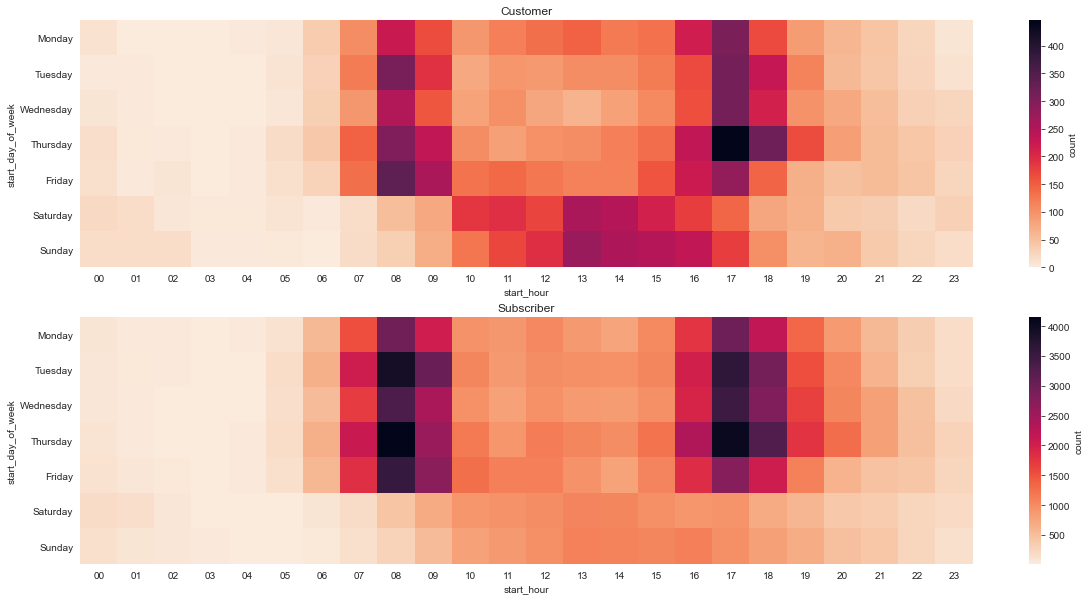

In [50]:
fig, ax = plt.subplots(figsize=[20,10])

plt.subplot(2, 1, 1)
df_filter = df_bay_clean[df_bay_clean['user_type']=='Customer']
df_group = df_filter.groupby(['start_hour', 'start_day_of_week']).count()['duration_sec']
df_group = df_group.reset_index(name = 'count')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
sb.heatmap(df_group, cbar_kws = {'label' : 'count'},cmap='rocket_r')
plt.title('Customer')

plt.subplot(2, 1, 2)
df_filter = df_bay_clean[df_bay_clean['user_type']=='Subscriber']
df_group = df_filter.groupby(['start_hour', 'start_day_of_week']).count()['duration_sec']
df_group = df_group.reset_index(name = 'count')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
sb.heatmap(df_group, cbar_kws = {'label' : 'count'},cmap='rocket_r')
plt.title('Subscriber');

Here we confirm that the peak hours of usage during the week is practically the same for both user types. However, the difference between the user types on the weekend is much more evident: occasional customers use the service more, especially between 10am and 5pm. This reinforces the idea that these customers are the ones who use the service more for leisure

#### What's mean of trip duration by user type and start day of week ?

<AxesSubplot:xlabel='user_type', ylabel='start_day_of_week'>

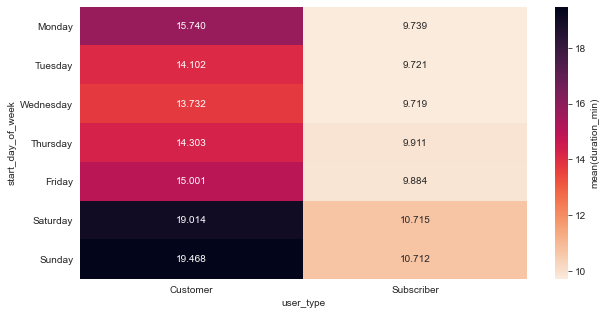

In [51]:
fig, ax = plt.subplots(figsize=[10,5])
df_group = df_bay_clean.groupby(['user_type', 'start_day_of_week']).mean()['duration_min']
df_group = df_group.reset_index(name = 'duration_min_avg')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(df_group, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'},cmap='rocket_r')

Although subscribers have a smaller number of users on weekends, this is not reflected in the average trip duration behavior: on weekends for both user types the average trip duration is longer on weekend

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Analysing the relationship between usuer type, start hour and start day of week we confirm that the peak hours of usage during the week is practically the same for both user types. However, the difference between the user types on the weekend is much more evident: occasional customers use the service more, especially between 10am and 5pm. This reinforces the idea that these customers are the ones who use the service more for leisure
- Although subscribers have a smaller number of users on weekends, this is not reflected in the average trip duration behavior: on weekends for both user types the average trip duration is longer on weekend

### Were there any interesting or surprising interactions between features?

The biggest point of interest was the confirmation that occasional customers are what we can most classify as "leisure customers"

#### Export the cleaned dataframe to use on explanatory step
Once I'm sure this dataframe is structured and with quality to answer the necessary questions, I'll export it to be able to use it in the explanatory step

In [52]:
df_bay_clean.to_csv('c:/git-repository/data-analyst-nanodegree/projects/project-5-communicate-data-findings/data/201902-fordgobike-tripdata_cleaned.csv',index=False)